In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

In [2]:
feat_file=pd.read_csv('cancer_mordred_preprocessed.csv')

In [3]:
feat_file.head()

,ABC,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VE2_A,VR1_A,VR3_A,...,JGI9,JGI10,JGT10,Diameter,TopoShapeIndex,SRW03,SRW05,TSRW10,WPath,mZagreb1
0,0.121378,0.0,0.0,0.165387,0.722883,0.785705,0.625380,0.172377,0.000007,0.325947,...,0.000000,0.000000,0.570573,8.000000e-08,0.60,0.0,0.000000,0.255696,1.210999e-09,0.142857
1,0.187982,0.2,0.2,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.460767,0.614607,0.593865,1.000000e+00,0.00,0.0,0.555084,0.412322,1.242729e-02,0.133016
2,0.161982,0.0,0.0,0.232151,0.766968,0.882304,0.685177,0.152569,0.000011,0.359675,...,0.000000,0.000000,0.431425,8.000000e-08,1.00,0.0,0.000000,0.335127,1.919619e-09,0.125236
3,0.150052,0.1,0.0,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.000000,0.000000,0.502729,1.000000e+00,0.00,0.0,0.437189,0.361216,1.586462e-02,0.153556
4,0.073037,0.0,0.0,0.115319,0.672574,0.876552,0.525463,0.248485,0.000004,0.264019,...,0.000000,0.000000,0.267857,7.000000e-08,0.75,0.0,0.000000,0.204382,3.516658e-10,0.053493


In [4]:
feat_file.shape

(2129, 820)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 820)

In [10]:
X_train_filtered=pd.read_csv('min_acqui_20(20)_train.csv')

In [11]:
X_train_filtered.head()

,ATSC5c,ATSC1se,MAXdsN,MAXsssN,NdS,ATSC2Z,MDEC-11,VSA_EState5,nBridgehead,nG12FAHRing,n12FRing,PEOE_VSA5,nBase,EState_VSA2,AATSC2d,MAXsssCH,AATS8s,MAXtsC,SM1_Dzv,ATSC2s
0,0.402300,0.777783,0.475173,0.681405,0.00,0.496612,5.471106e-02,0.886260,0.0,0.0,0.0,0.0,0.0,0.036641,0.580502,0.913216,0.022119,0.403354,0.928277,0.469465
1,0.400586,0.861490,0.475173,0.681405,0.00,0.475678,7.829765e-02,0.834768,0.0,0.0,0.0,0.0,0.0,0.035899,0.632655,0.683987,0.055268,0.403354,0.920140,0.516365
2,0.400421,0.740509,0.475173,0.681405,0.00,0.473790,1.753489e-02,0.834768,0.0,0.0,0.0,0.0,0.1,0.041303,0.494865,0.663855,0.000174,0.403354,0.920140,0.444627
3,0.394500,0.818338,0.475173,0.681405,0.00,0.476750,7.829765e-02,0.834768,0.0,0.0,0.0,0.0,0.0,0.000000,0.523656,0.683987,0.037315,0.403354,0.930307,0.443403
4,0.404344,0.783294,0.475173,0.744955,0.75,0.625515,5.469398e-07,0.834768,0.0,0.0,0.0,0.0,0.0,0.057748,0.347485,0.683987,0.037315,0.403354,0.908125,0.479091


In [12]:
X_test_filtered=pd.read_csv('min_acqui_20(20)_test.csv')

In [13]:
X_test_filtered.head()

,ATSC5c,ATSC1se,MAXdsN,MAXsssN,NdS,ATSC2Z,MDEC-11,VSA_EState5,nBridgehead,nG12FAHRing,n12FRing,PEOE_VSA5,nBase,EState_VSA2,AATSC2d,MAXsssCH,AATS8s,MAXtsC,SM1_Dzv,ATSC2s
0,0.410683,0.829180,0.463410,0.681405,0.00,0.484627,0.035070,0.834768,0.0,0.0,0.0,0.052374,0.0,0.000000,0.450178,0.683987,0.037315,0.403354,0.922170,0.471437
1,0.404344,0.771290,0.475173,0.681405,0.00,0.451923,0.078298,0.834768,0.0,0.0,0.0,0.250000,0.0,0.000000,0.653117,0.683987,0.037315,0.403354,0.884276,0.446769
2,0.281949,0.744742,0.475173,0.681405,0.00,0.498145,0.021042,0.836975,0.0,0.0,0.0,0.000000,0.0,0.074015,0.674217,0.683987,0.082555,0.403354,0.873392,0.555729
3,0.455817,0.735010,0.475173,0.681405,0.00,0.476535,0.078298,0.819577,0.0,0.0,0.0,0.000000,0.0,0.000000,0.390742,0.683987,0.037315,0.403354,0.516788,0.451497
4,0.404344,0.763431,0.475173,0.681405,0.25,0.493636,0.078298,0.834768,0.0,0.0,0.0,0.000000,0.0,0.000000,0.462545,0.683987,0.037315,0.403354,0.944491,0.449883


## RFC

In [14]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values=forest.predict_proba(X_test_filtered)

In [15]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[115  84]
 [ 75 152]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6053    0.5779    0.5913       199
           1     0.6441    0.6696    0.6566       227

    accuracy                         0.6268       426
   macro avg     0.6247    0.6237    0.6239       426
weighted avg     0.6259    0.6268    0.6261       426



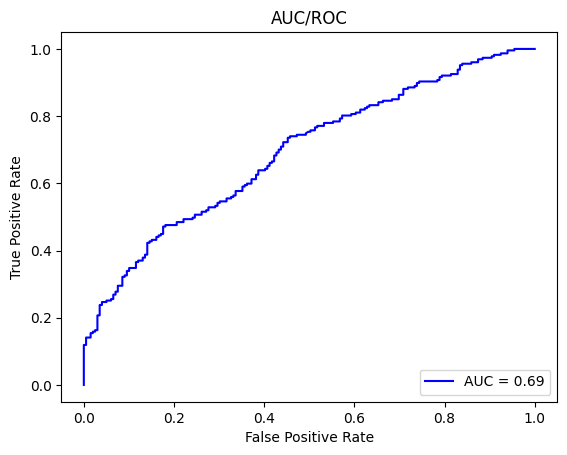

In [16]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)
y_prediction_values=KNN.predict_proba(X_test_filtered)

In [18]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa=knn_kappa_train
knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[116  83]
 [ 81 146]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5888    0.5829    0.5859       199
           1     0.6376    0.6432    0.6404       227

    accuracy                         0.6150       426
   macro avg     0.6132    0.6130    0.6131       426
weighted avg     0.6148    0.6150    0.6149       426



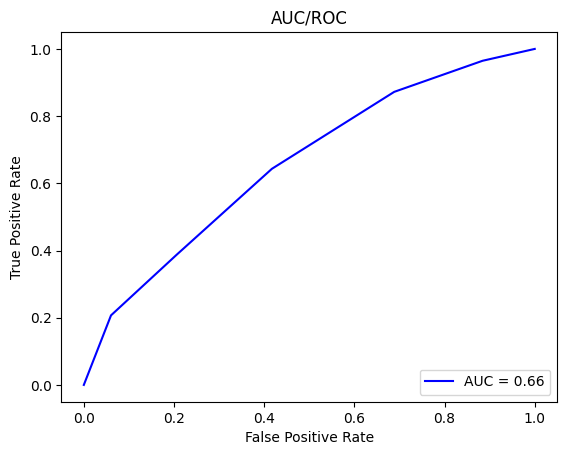

In [19]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [20]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)
y_prediction_values=model.predict_proba(X_test_filtered)

In [21]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
svc_kappa=knn_kappa_train
svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
svc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 88 111]
 [ 49 178]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6423    0.4422    0.5238       199
           1     0.6159    0.7841    0.6899       227

    accuracy                         0.6244       426
   macro avg     0.6291    0.6132    0.6069       426
weighted avg     0.6283    0.6244    0.6123       426



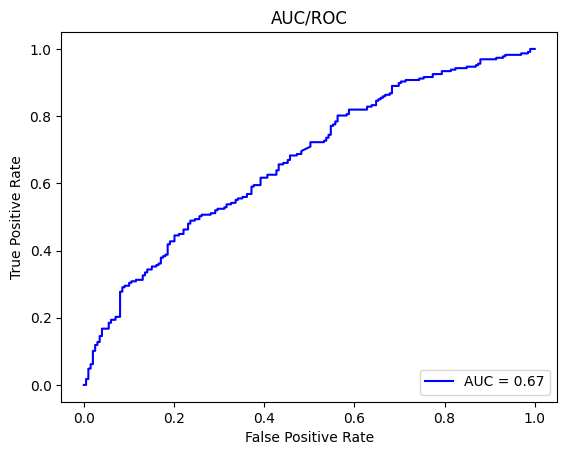

In [22]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)
y_prediction_values=lr.predict_proba(X_test_filtered)

In [24]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lr_kappa=knn_kappa_train
lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lr_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[102  97]
 [ 72 155]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5862    0.5126    0.5469       199
           1     0.6151    0.6828    0.6472       227

    accuracy                         0.6033       426
   macro avg     0.6006    0.5977    0.5970       426
weighted avg     0.6016    0.6033    0.6003       426



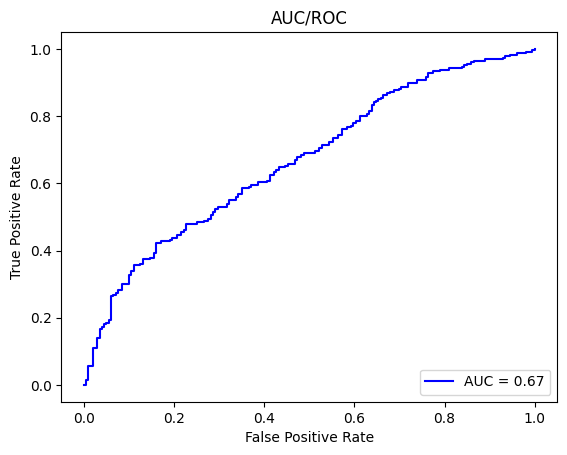

In [25]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values=xgb.predict_proba(X_test_filtered)

[10:54:37] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [27]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)
xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
xgb_kappa=knn_kappa_train
xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
xgb_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[130  69]
 [ 58 169]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6915    0.6533    0.6718       199
           1     0.7101    0.7445    0.7269       227

    accuracy                         0.7019       426
   macro avg     0.7008    0.6989    0.6994       426
weighted avg     0.7014    0.7019    0.7012       426



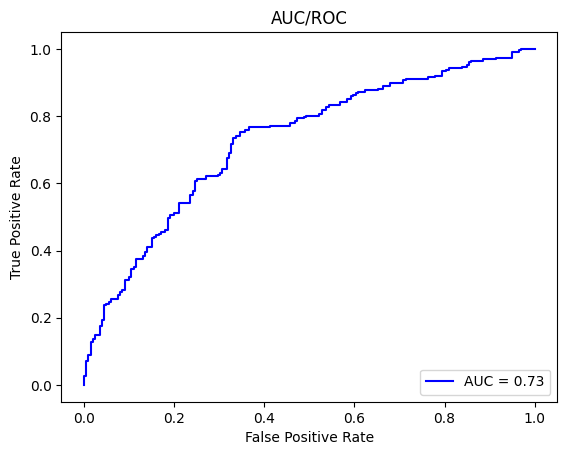

In [28]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values=clf.predict_proba(X_test_filtered)

In [30]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
clf_kappa=knn_kappa_train
clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
clf_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 67 132]
 [ 25 202]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7283    0.3367    0.4605       199
           1     0.6048    0.8899    0.7201       227

    accuracy                         0.6315       426
   macro avg     0.6665    0.6133    0.5903       426
weighted avg     0.6625    0.6315    0.5988       426



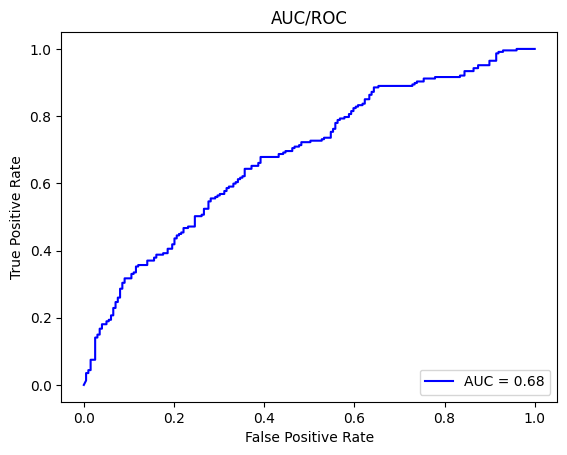

In [31]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values=mlp.predict_proba(X_test_filtered)

In [33]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)
mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
mlp_kappa=knn_kappa_train
mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
mlp_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[124  75]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6200    0.6231    0.6216       199
           1     0.6681    0.6652    0.6667       227

    accuracy                         0.6455       426
   macro avg     0.6441    0.6442    0.6441       426
weighted avg     0.6457    0.6455    0.6456       426



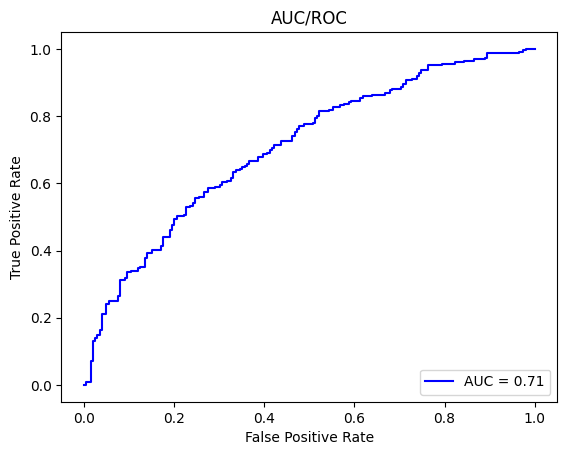

In [34]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values=etc.predict_proba(X_test_filtered)

In [36]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)
etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
etc_kappa=knn_kappa_train
etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
etc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[131  68]
 [ 71 156]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6485    0.6583    0.6534       199
           1     0.6964    0.6872    0.6918       227

    accuracy                         0.6737       426
   macro avg     0.6725    0.6728    0.6726       426
weighted avg     0.6740    0.6737    0.6738       426



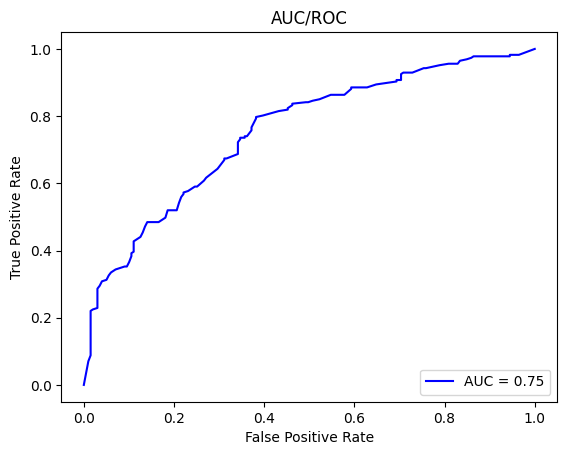

In [37]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [38]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)
y_prediction_values=dtc.predict_proba(X_test_filtered)
                            

In [39]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)
dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
dtc_kappa=knn_kappa_train
dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
dtc_kappa=knn_kappa_test
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[106  93]
 [ 87 140]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5492    0.5327    0.5408       199
           1     0.6009    0.6167    0.6087       227

    accuracy                         0.5775       426
   macro avg     0.5750    0.5747    0.5748       426
weighted avg     0.5767    0.5775    0.5770       426



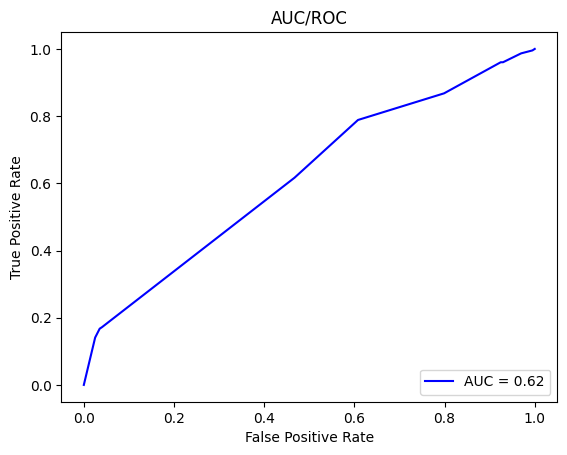

In [40]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)
y_prediction_values=lda.predict_proba(X_test_filtered)
                            

In [42]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)
lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lda_kappa=knn_kappa_train
lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lda_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[110  89]
 [ 80 147]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5789    0.5528    0.5656       199
           1     0.6229    0.6476    0.6350       227

    accuracy                         0.6033       426
   macro avg     0.6009    0.6002    0.6003       426
weighted avg     0.6024    0.6033    0.6026       426



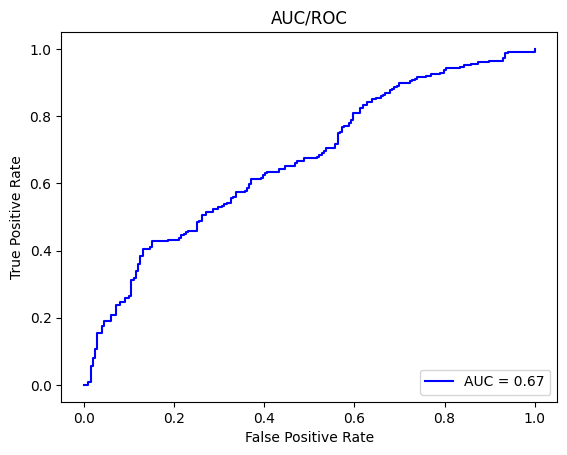

In [43]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [44]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
df_train = pd.DataFrame(data_train)

In [45]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa],
               'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
             
             
df_test = pd.DataFrame(data_test)             

In [46]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC
0,RFC,74.163241,0.482560,0.741017,0.740374,0.767389,0.482218,0.690888
1,KNN,77.392836,0.547337,0.773377,0.770330,0.799316,0.546925,0.657517
2,SVC,63.534938,0.277232,0.622347,0.612084,0.797035,0.263171,0.667988
3,LR,63.006459,0.259132,0.625838,0.622642,0.714937,0.256061,0.668475
4,XGB,93.834410,0.876799,0.938227,0.928889,0.953250,0.876478,0.727160
5,GNB,60.892543,0.245723,0.569224,0.578555,0.885975,0.204093,0.682211
6,MLP,67.175573,0.342421,0.670226,0.668790,0.718358,0.341415,0.706882
7,ETC,99.765120,0.995298,0.997649,0.997719,0.997719,0.995298,0.753116
8,DTC,68.878450,0.376575,0.687642,0.686760,0.727480,0.375868,0.618312
9,LDA,64.533177,0.289285,0.643348,0.643232,0.698974,0.288122,0.667722


In [47]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC
0,RFC,62.676056,0.248410,0.623924,0.644068,0.669604,0.248185,0.690888
1,KNN,61.502347,0.226237,0.613105,0.637555,0.643172,0.226227,0.657517
2,SVC,62.441315,0.241777,0.606866,0.615917,0.784141,0.230787,0.667988
3,LR,60.328638,0.198312,0.597049,0.615079,0.682819,0.196908,0.668475
4,XGB,70.187793,0.399662,0.699358,0.710084,0.744493,0.399120,0.727160
5,GNB,63.145540,0.274687,0.590312,0.604790,0.889868,0.234322,0.682211
6,MLP,64.553991,0.288228,0.644110,0.668142,0.665198,0.288224,0.706882
7,ETC,67.370892,0.345230,0.672581,0.696429,0.687225,0.345195,0.753116
8,DTC,57.746479,0.149742,0.574756,0.600858,0.616740,0.149682,0.618312
9,LDA,60.328638,0.201083,0.600271,0.622881,0.647577,0.226227,0.667722
